# **BERTopic - Tutorial**
We start with installing bertopic from pypi before preparing the data. 

**NOTE**: Make sure to select a GPU runtime. Otherwise, the model can take quite some time to create the document embeddings!

# **Prepare data**
For this example, we use the popular 20 Newsgroups dataset which contains roughly 18000 newsgroups posts on 20 topics.

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
 
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

# **Create Topics**
We select the "english" as the main language for our documents. If you want a multilingual model that supports 50+ languages, please select "multilingual" instead. 

In [ ]:
model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)

100%|██████████| 245M/245M [00:16<00:00, 14.4MB/s]


We can then extract most frequent topics:

In [ ]:
model.get_topic_freq().head(5)

,Topic,Count
0,-1,7288
1,49,3992
2,30,701
3,27,684
4,11,568


-1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated:

In [ ]:
model.get_topic(49)[:10]

[('windows', 0.006152228076250982),
 ('drive', 0.004982897610645755),
 ('dos', 0.004845038866360651),
 ('file', 0.004140142872194834),
 ('disk', 0.004131678774810884),
 ('mac', 0.003624848635985097),
 ('memory', 0.0034840976976789903),
 ('software', 0.0034415334250699077),
 ('email', 0.0034239554442333257),
 ('pc', 0.003047105930670237)]

Note that the model is stocastich which mmeans that the topics might differ across runs. 

For a full list of support languages, see the values below:

In [ ]:
from bertopic import languages
print(languages)

['Afrikaans', 'Albanian', 'Amharic', 'Arabic', 'Armenian', 'Assamese', 'Azerbaijani', 'Basque', 'Belarusian', 'Bengali', 'Bengali Romanize', 'Bosnian', 'Breton', 'Bulgarian', 'Burmese', 'Burmese zawgyi font', 'Catalan', 'Chinese (Simplified)', 'Chinese (Traditional)', 'Croatian', 'Czech', 'Danish', 'Dutch', 'English', 'Esperanto', 'Estonian', 'Filipino', 'Finnish', 'French', 'Galician', 'Georgian', 'German', 'Greek', 'Gujarati', 'Hausa', 'Hebrew', 'Hindi', 'Hindi Romanize', 'Hungarian', 'Icelandic', 'Indonesian', 'Irish', 'Italian', 'Japanese', 'Javanese', 'Kannada', 'Kazakh', 'Khmer', 'Korean', 'Kurdish (Kurmanji)', 'Kyrgyz', 'Lao', 'Latin', 'Latvian', 'Lithuanian', 'Macedonian', 'Malagasy', 'Malay', 'Malayalam', 'Marathi', 'Mongolian', 'Nepali', 'Norwegian', 'Oriya', 'Oromo', 'Pashto', 'Persian', 'Polish', 'Portuguese', 'Punjabi', 'Romanian', 'Russian', 'Sanskrit', 'Scottish Gaelic', 'Serbian', 'Sindhi', 'Sinhala', 'Slovak', 'Slovenian', 'Somali', 'Spanish', 'Sundanese', 'Swahili', '

# **Embedding model**
You can select any model from `sentence-transformers` and use it instead of the preselected models by simply passing the model through  
BERTopic with `embedding_model`:

In [ ]:
# st_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

Click [here](https://www.sbert.net/docs/pretrained_models.html) for a list of supported sentence transformers models.  


# **Visualize Topics**
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good 
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation. 
Instead, we can visualize the topics that were generated in a way very similar to 
[LDAvis](https://github.com/cpsievert/LDAvis):

In [ ]:
model.visualize_topics()

# **Visualize Topic Probabilities**

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can 
be used to understand how confident BERTopic is that certain topics can be found in a document. 

To visualize the distributions, we simply call:

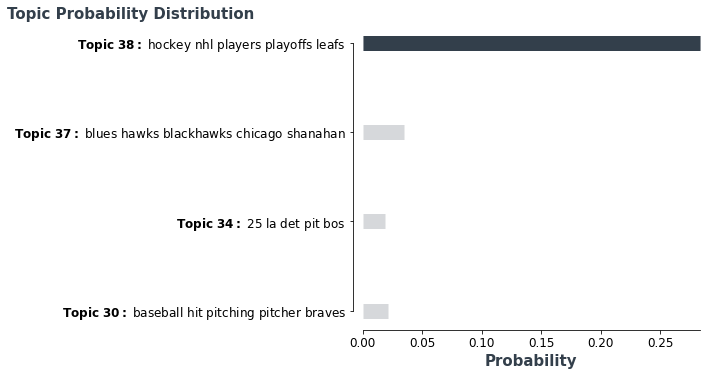

In [ ]:
model.visualize_distribution(probs[0])

# **Topic Reduction**
Finally, we can also reduce the number of topics after having trained a BERTopic model. The advantage of doing so, 
is that you can decide the number of topics after knowing how many are actually created. It is difficult to 
predict before training your model how many topics that are in your documents and how many will be extracted. 
Instead, we can decide afterwards how many topics seems realistic:





In [ ]:
new_topics, new_probs = model.reduce_topics(docs, topics, probs, nr_topics=60)


The reasoning for putting `docs`, `topics`, and `probs` as parameters is that these values are not saved within 
BERTopic on purpose. If you were to have a million documents, it seems very inefficient to save those in BERTopic 
instead of a dedicated database.  

# **Topic Representation**
When you have trained a model and viewed the topics and the words that represent them,
you might not be satisfied with the representation. Perhaps you forgot to remove
stop_words or you want to try out a different n_gram_range. We can use the function `update_topics` to update 
the topic representation with new parameters for `c-TF-IDF`: 


In [ ]:
model.update_topics(docs, topics, n_gram_range=(1, 3), stop_words="english")

# **Search Topics**
After having trained our model, we can use `find_topics` to search for topics that are similar 
to an input search_term. Here, we are going to be searching for topics that closely relate the 
search term "vehicle". Then, we extract the most similar topic and check the results: 

In [ ]:
similar_topics, similarity = model.find_topics("vehicle", top_n=5); similar_topics

[28, 33, 20, 18, 49]

In [ ]:
model.get_topic(28)

[('car', 0.043816884839494336),
 ('dealer', 0.018083187684167435),
 ('ford', 0.008460673652078586),
 ('bought', 0.007589563051028973),
 ('dealership', 0.0071675465843055045),
 ('odometer', 0.0071675465843055045),
 ('consumer', 0.006287931894176063),
 ('salesman', 0.005942906070333744),
 ('dealers', 0.005691645933436952),
 ('mazda', 0.005379727257156868)]

# **Model serialization**
The model and its internal settings can easily be saved. Note that the documents and embeddings will not be saved. However, UMAP and HDBSCAN will be saved. 

In [ ]:
# Save model
model.save("my_model")

In [ ]:
# Load model
my_model = BERTopic.load("my_model")